In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import *
from sklearn.cluster import *
from sklearn.metrics import *

In [3]:
plt.style.use('dark_background')

In [4]:
df = pd.read_csv('Cricket.csv', encoding='latin1')

In [5]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


- player -> names
- span - time they have played
- mat -> number of matches
- inns -> innings
- NO -> not out
- Runs -> number of runs
- HS -> High score
- Ave -> Average
- BF -> balls faced
- SR -> strike rate
- 100 -> centuries
- 50 -> half cen
- 0 -> ducks

In [6]:
df.shape

(79, 13)

In [7]:
df['Player'].nunique()

79

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [9]:
df.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20


In [10]:
df[['start', 'end']] = df.Span.str.split('-', expand = True).astype(int)

In [11]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     int32  
 14  end     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(3)
memory usage: 8.8+ KB


In [13]:
df['experience']=df['end']-df['start']

In [14]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [15]:
df = df.drop(['Span', 'start', 'end'], axis = 1)

In [16]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [17]:
df[['HS', 'extra']]=df.HS.str.split("*",expand=True)

In [18]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,extra
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,None
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,None
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,None
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,None


In [19]:
df = df.drop('extra', axis = 1)

In [20]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [21]:
df['HS'] = pd.to_numeric(df['HS'],errors = 'coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  experience  79 non-null     int32  
dtypes: float64(2), int32(1), int64(9), object(1)
memory usage: 7.8+ KB


In [23]:
df.isnull().sum()

Player        0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
experience    0
dtype: int64

In [24]:
df[df.duplicated()].sum()

Player          0
Mat             0
Inns            0
NO              0
Runs            0
HS              0
Ave           0.0
BF              0
SR            0.0
100             0
50              0
0               0
experience      0
dtype: object

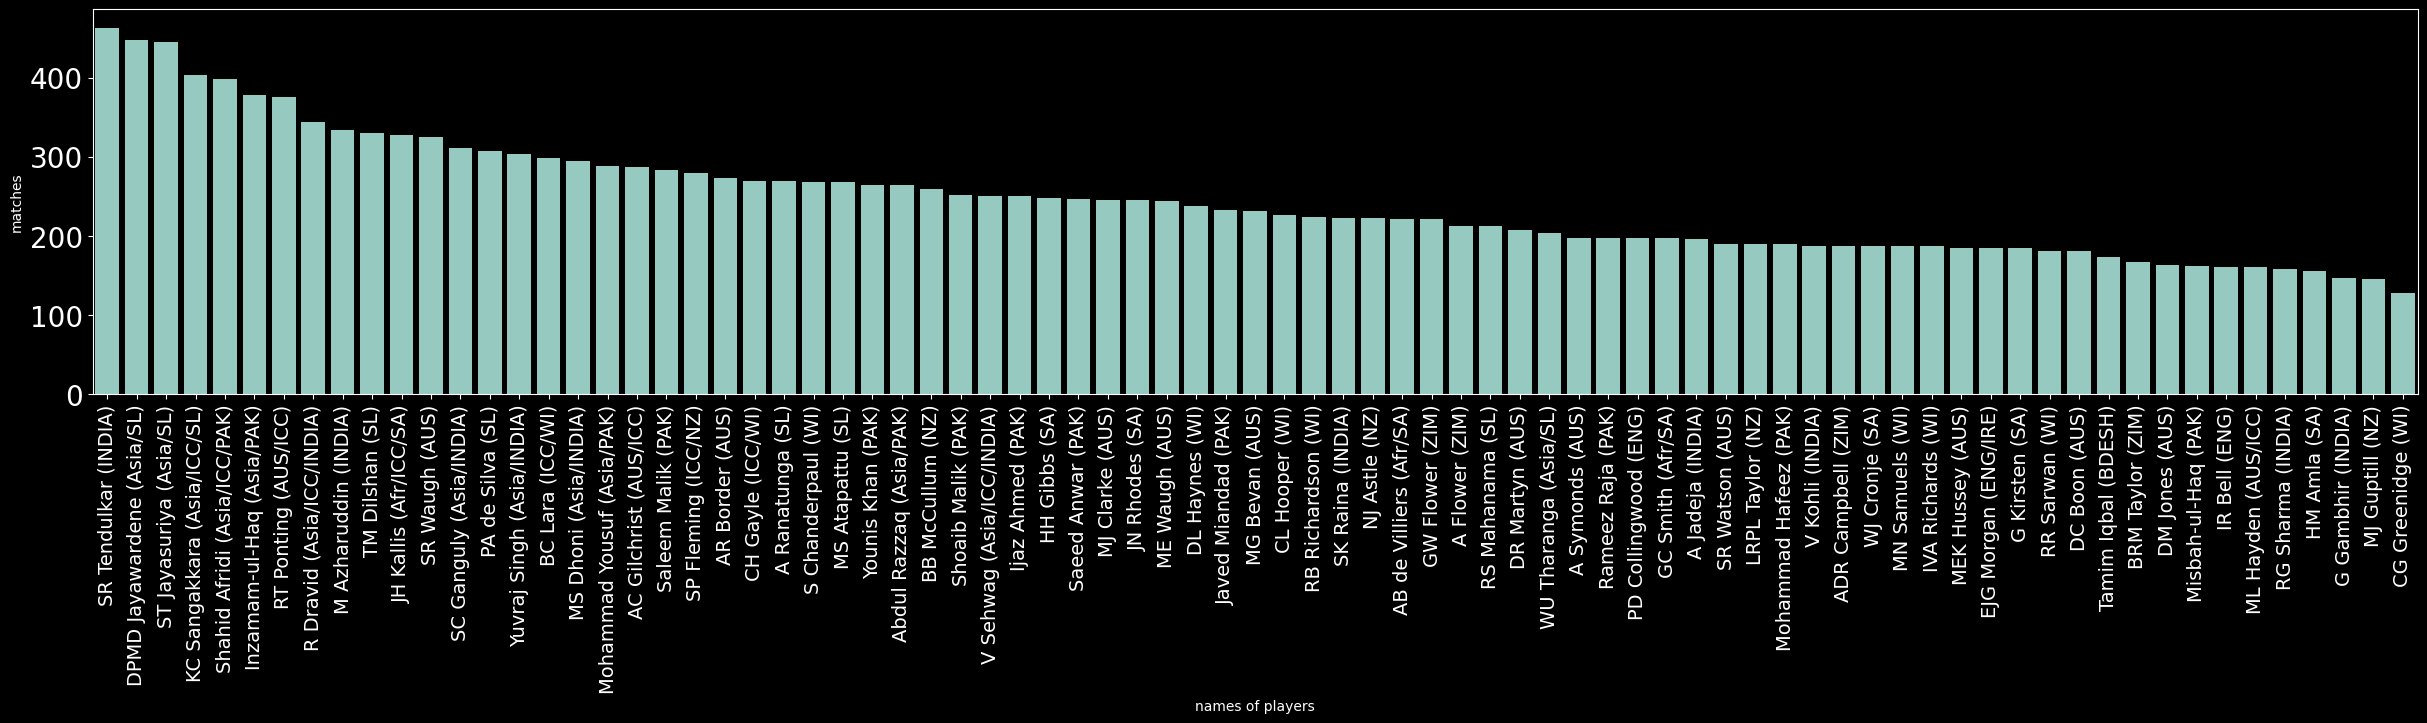

In [25]:

plt.figure(figsize=(30,5))
mat=df[['Player','Mat']].sort_values('Mat',ascending=False)
ax=sns.barplot(x='Player',y='Mat',data=mat)
ax.set(xlabel='names of players',ylabel="matches")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=20)

plt.show()

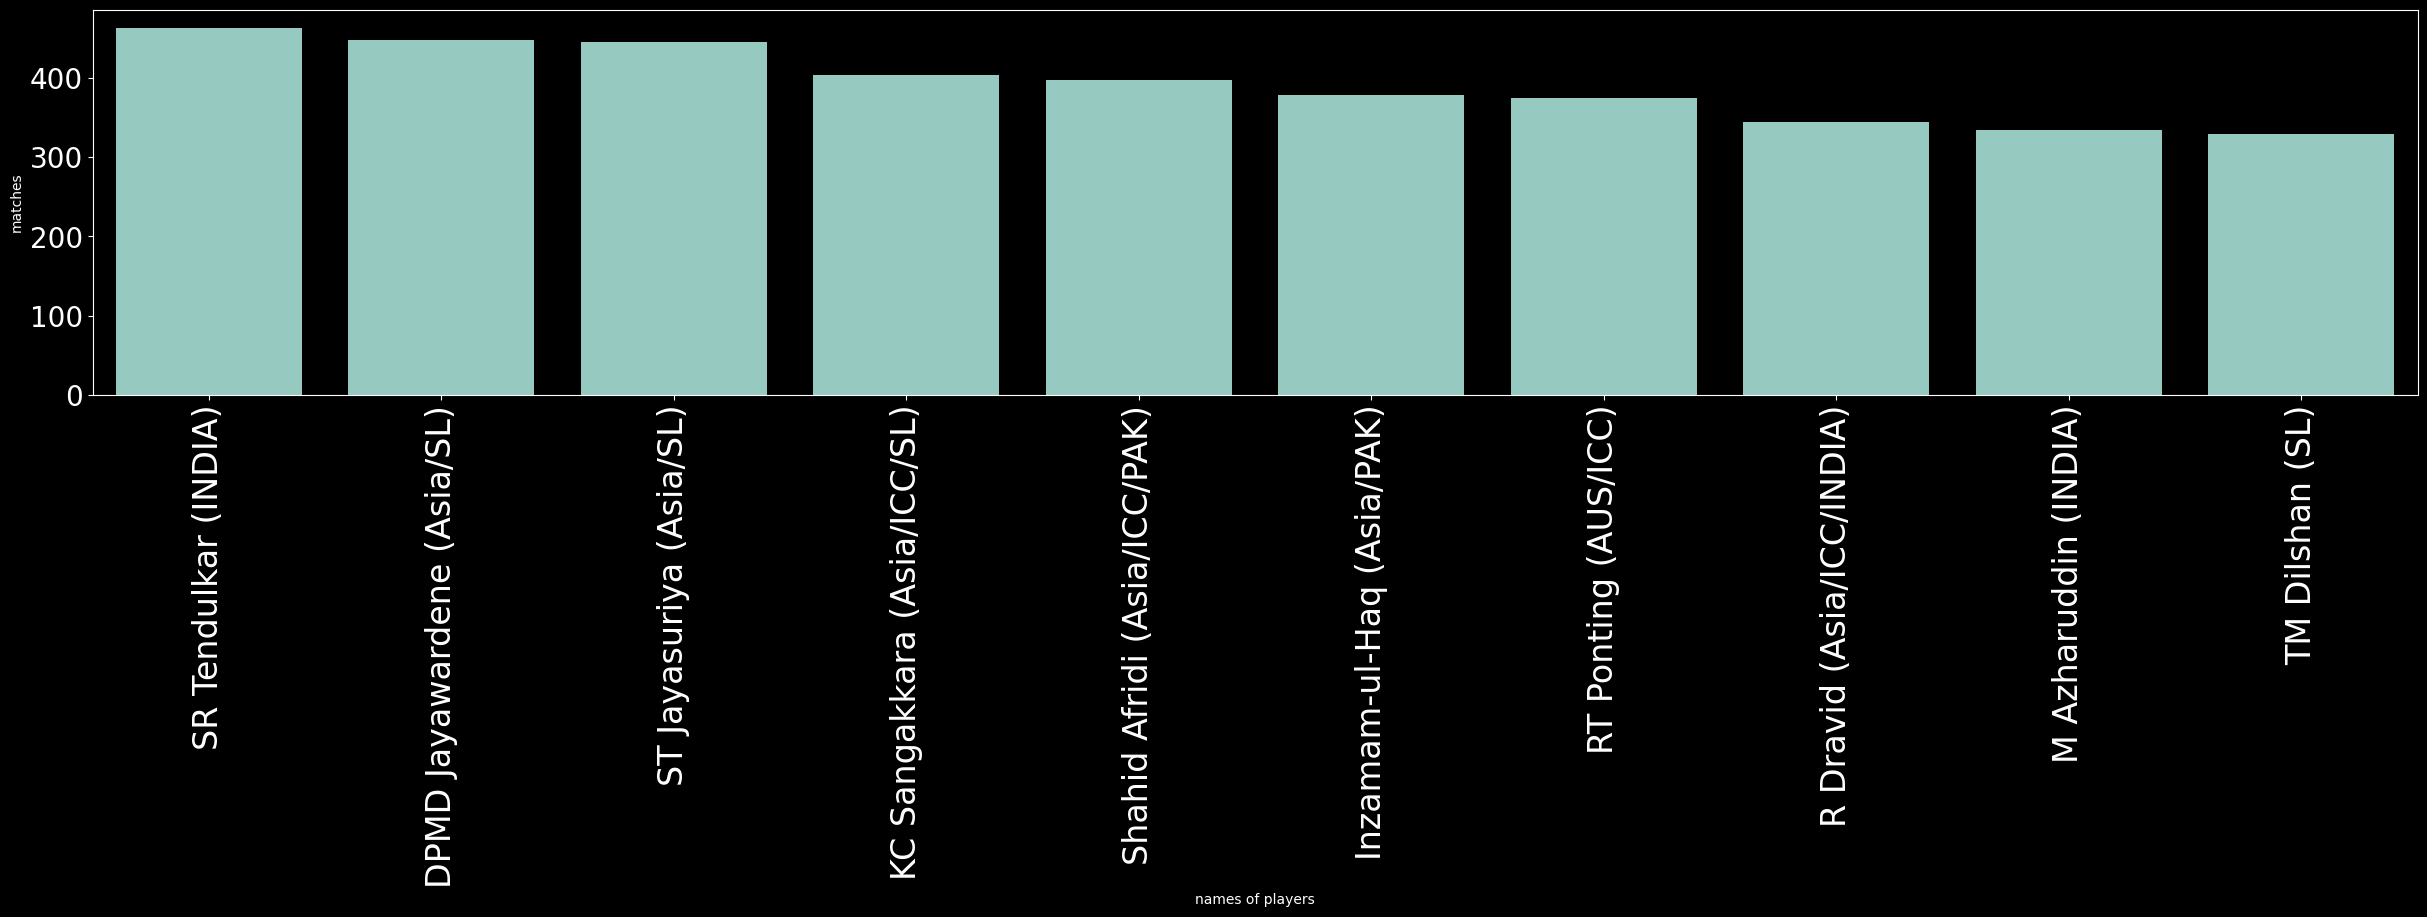

In [26]:
plt.figure(figsize=(30,5))
mat=df[['Player','Mat']].sort_values('Mat',ascending=False).head(10)
ax=sns.barplot(x='Player',y='Mat',data=mat)
ax.set(xlabel='names of players',ylabel="matches")
plt.xticks(rotation=90,fontsize=24)
plt.yticks(fontsize=20)
plt.show()

In [27]:
a=df.drop('Player',axis=1)

In [28]:
a.corr()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
Mat,1.000000,0.990661,0.433992,0.864500,0.089757,-0.204473,0.798576,0.183694,0.466574,0.777884,0.673924,0.687774
Inns,0.990661,1.000000,0.338788,0.896270,0.137518,-0.210776,0.838206,0.152891,0.530225,0.800381,0.697878,0.698699
NO,0.433992,0.338788,1.000000,0.260526,-0.312561,0.241971,0.275283,-0.019291,-0.121577,0.350533,-0.101977,0.233812
Runs,0.864500,0.896270,0.260526,1.000000,0.335049,0.172331,0.936736,0.146401,0.776243,0.914436,0.497139,0.589688
HS,0.089757,0.137518,-0.312561,0.335049,1.000000,0.250068,0.192006,0.388540,0.568856,0.180646,0.222399,0.051748
Ave,-0.204473,-0.210776,0.241971,0.172331,0.250068,1.000000,0.132089,0.098574,0.345500,0.240353,-0.536602,-0.238810
BF,0.798576,0.838206,0.275283,0.936736,0.192006,0.132089,1.000000,-0.196835,0.658980,0.933328,0.402524,0.584006
SR,0.183694,0.152891,-0.019291,0.146401,0.388540,0.098574,-0.196835,1.000000,0.257617,-0.047072,0.271291,0.000201
100,0.466574,0.530225,-0.121577,0.776243,0.568856,0.345500,0.658980,0.257617,1.000000,0.557369,0.338982,0.338881
50,0.777884,0.800381,0.350533,0.914436,0.180646,0.240353,0.933328,-0.047072,0.557369,1.000000,0.357128,0.505346


<Axes: >

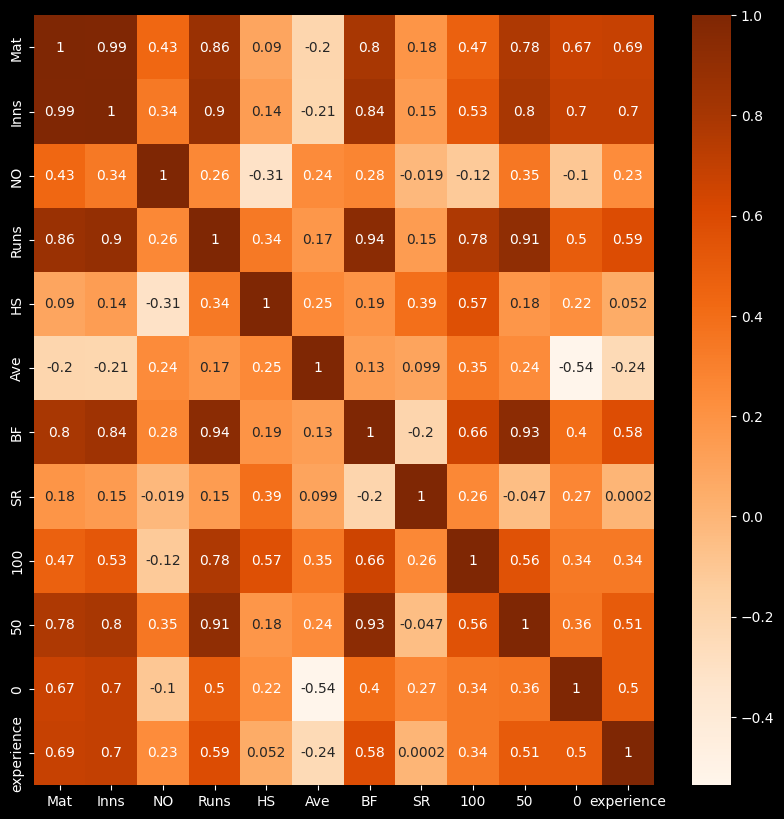

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(a.corr(),annot=True, cmap='Oranges')

In [30]:
sc = StandardScaler()

In [31]:
df_scaled = sc.fit_transform(a)

In [32]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [33]:
cols = a.columns
cols

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'experience'],
      dtype='object')

In [34]:
data = pd.DataFrame(df_scaled, columns = cols)

In [35]:
data.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [36]:
'''cluster = KMeans()
cluster.fit(a)
cluster.labels_'''

'cluster = KMeans()\ncluster.fit(a)\ncluster.labels_'

for n_clusters: 2 the score is: 0.3136820966012298
for n_clusters: 3 the score is: 0.21330549499868015
for n_clusters: 4 the score is: 0.1877231225467428
for n_clusters: 5 the score is: 0.1915496036231499
for n_clusters: 6 the score is: 0.1762527378252155
for n_clusters: 7 the score is: 0.17421444633075953
for n_clusters: 8 the score is: 0.1826999164980071
for n_clusters: 9 the score is: 0.18514548894829214
for n_clusters: 10 the score is: 0.16970710932460828
for n_clusters: 11 the score is: 0.1628816064298741
for n_clusters: 12 the score is: 0.1760099753364303
for n_clusters: 13 the score is: 0.17357490328675804
for n_clusters: 14 the score is: 0.1691287216369505


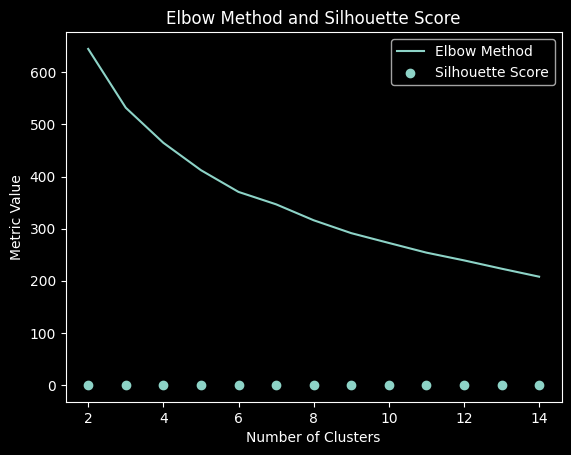

In [44]:
ssd = []
sil_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,max_iter = 150, random_state=50)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)
    s = silhouette_score(data, kmeans.labels_)
    sil_scores.append(s)
    print(f"for n_clusters: {k} the score is: {s}")

# Plot the elbow method
plt.plot(range(2, 15), ssd, label="Elbow Method")

# Plot the silhouette score
plt.scatter(range(2, 15), sil_scores, label="Silhouette Score")

plt.xlabel("Number of Clusters")
plt.ylabel("Metric Value")
plt.title("Elbow Method and Silhouette Score")
plt.legend()
plt.show()

In [46]:
clusters=KMeans(n_clusters=3, max_iter=150,random_state=80)
clusters.fit(data)

KMeans(max_iter=150, n_clusters=3, random_state=80)

In [47]:
pred=clusters.predict(data)

In [48]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [51]:
df['clusters'] = clusters.labels_

In [52]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0


In [53]:
df['clusters'].value_counts()

clusters
1    40
2    30
0     9
Name: count, dtype: int64

In [54]:
x = data.iloc[:,[3,6]].values

In [55]:
kmeans = clusters.fit_predict(x)

In [56]:
kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: >

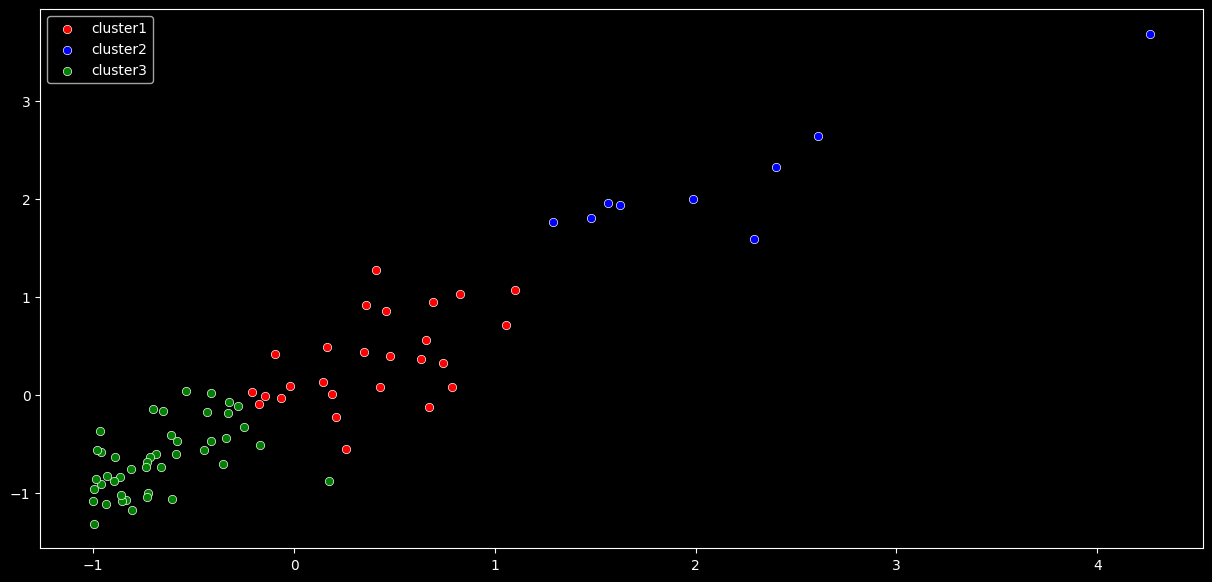

In [58]:
plt.figure(figsize=(15,7))
sns.scatterplot(x =x[kmeans == 0,0], y = x[kmeans==0,1], color = 'red' , label='cluster1')
sns.scatterplot(x =x[kmeans == 1,0], y = x[kmeans==1,1], color = 'blue' , label='cluster2')
sns.scatterplot(x =x[kmeans == 2,0], y = x[kmeans==2,1], color = 'green' , label='cluster3')

<Axes: >

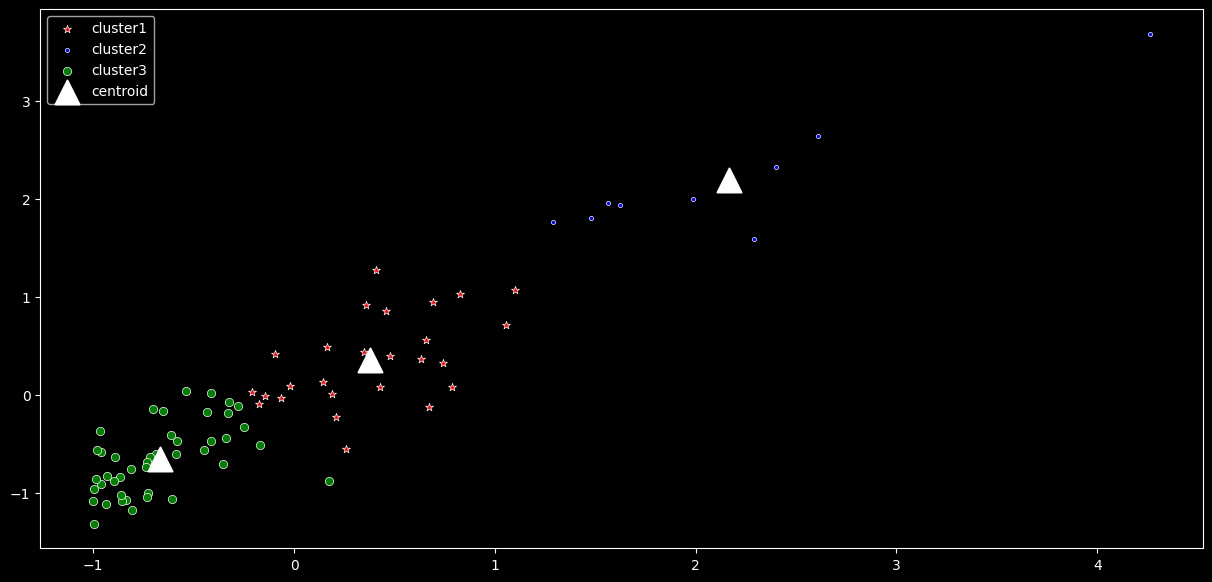

In [60]:
# figure size
plt.figure(figsize=(15,7))
# 3 clusters
sns.scatterplot(x=x[kmeans==0,0],y=x[kmeans==0,1], color='red',label='cluster1',marker='*')
sns.scatterplot(x=x[kmeans==1,0],y=x[kmeans==1,1], color='blue',label='cluster2',marker='.')
sns.scatterplot(x=x[kmeans==2,0],y=x[kmeans==2,1], color='green',label='cluster3',marker='o')
# to display the clusters on graph
sns.scatterplot(x=clusters.cluster_centers_[0:3,0],y=clusters.cluster_centers_[0:3,1],color='white',
                label='centroid',s=300,marker='^')

In [65]:
clusters.cluster_centers_[:,0]

array([ 0.380515  ,  2.16689307, -0.6680779 ])

In [66]:
clusters.cluster_centers_[:,1]

array([ 0.35065179,  2.18622171, -0.65438504])

In [67]:
df[df['clusters']==0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,0
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,0
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,0
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,0


In [68]:
df[df['clusters']==1]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,1
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,1
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,1
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,1
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,1
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,1
39,G Kirsten (SA),185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,1
40,A Flower (ZIM),213,208,16,6786,145,35.34,9097,74.59,4,55,13,11,1
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,1
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,1


In [69]:
df[df['clusters']==2]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,2
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,2
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,2
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,2
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,2
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,2
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,2
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,2
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,2
19,S Chanderpaul (WI),268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,2
